# COVID-19 Analysis

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from plotnine import *
import calmap

import plotly.express as px
import folium

%matplotlib inline

### load the data

In [9]:
df = pd.read_csv('covid_19_data.csv')
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,3395.000000,3395.000000,3395.000000,3395.000000
mean,1698.000000,611.823859,17.756112,167.704271
std,980.196409,5121.319656,187.195366,1650.055341
min,1.000000,0.000000,0.000000,0.000000
25%,849.500000,2.000000,0.000000,0.000000
50%,1698.000000,10.000000,0.000000,1.000000
75%,2546.500000,120.500000,1.000000,18.000000
max,3395.000000,67332.000000,2871.000000,38557.000000


### columns of the dataset

In [10]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

### preprocess

In [12]:
# add still infected column
#df['Still Infected'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
# replace Mainland China with China
df['Country/Region'] = df['Country/Region'].replace('Mainland China', 'China')
# fill na's
df[['Province/State']] = df[['Province/State']].fillna('NA')
df[['Confirmed', 'Deaths', 'Recovered']] = \
    df[['Confirmed', 'Deaths', 'Recovered']].fillna(0)

### now take a look at the data

In [13]:
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,China,1/22/2020 17:00,1.0,0.0,0.0


### we can group country and provinces

In [14]:
country_province_df = df.groupby(['Country/Region', 'Province/State']) \
                            ['Confirmed', 'Deaths', 'Recovered'].max()
country_province_df['Still Infected'] = country_province_df['Confirmed'] - country_province_df['Deaths'] - \
                                        country_province_df['Recovered']
country_province_df.head(10)

Confirmed  Deaths  Recovered  \
Country/Region Province/State                                        
 Azerbaijan    NA                           1.0     0.0        0.0   
Afghanistan    NA                           1.0     0.0        0.0   
Algeria        NA                          12.0     0.0        0.0   
Andorra        NA                           1.0     0.0        0.0   
Argentina      NA                           1.0     0.0        0.0   
Armenia        NA                           1.0     0.0        0.0   
Australia      From Diamond Princess        8.0     0.0        0.0   
               NA                           4.0     0.0        0.0   
               New South Wales             22.0     1.0        4.0   
               Northern Territory           1.0     0.0        0.0   

                                      Still Infected  
Country/Region Province/State                         
 Azerbaijan    NA                                1.0  
Afghanistan    NA                                1.0  
Algeria        NA                               12.0  
Andorra        NA                                1.0  
Argentina      NA                                1.0  
Armenia        NA                                1.0  
Australia      From Diamond Princess             8.0  
               NA                                4.0  
               New South Wales                  17.0  
               Northern Territory                1.0

### see which Province/State has the most confirmed

In [15]:
country_province_df.sort_values(by=['Confirmed'], ascending=False).head(10)

Confirmed  Deaths  Recovered  Still Infected
Country/Region Province/State                                              
China          Hubei             67332.0  2871.0    38557.0         25904.0
South Korea    NA                 5621.0    35.0       41.0          5545.0
Italy          NA                 3089.0   107.0      276.0          2706.0
Iran           NA                 2922.0    92.0      552.0          2278.0
China          Guangdong          1350.0     7.0     1133.0           210.0
               Henan              1272.0    22.0     1234.0            16.0
               Zhejiang           1213.0     1.0     1114.0            98.0
               Hunan              1018.0     4.0      916.0            98.0
               Anhui               990.0     6.0      956.0            28.0
               Jiangxi             935.0     1.0      884.0            50.0

### see the global overall numbers

In [16]:
global_overall = df.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()
global_overall['Still Infected'] = global_overall['Confirmed'] - global_overall['Deaths'] - \
                                   global_overall['Recovered']
global_overall.sort_values(by=['ObservationDate'], ascending=False).head(5)

,Confirmed,Deaths,Recovered,Still Infected
ObservationDate,,,,
03/04/2020,95124.0,3254.0,51171.0,40699.0
03/03/2020,92844.0,3160.0,48229.0,41455.0
03/02/2020,90309.0,3085.0,45602.0,41622.0
03/01/2020,88371.0,2996.0,42716.0,42659.0
02/29/2020,86013.0,2941.0,39782.0,43290.0


### china, us, canada overall numbers comparison

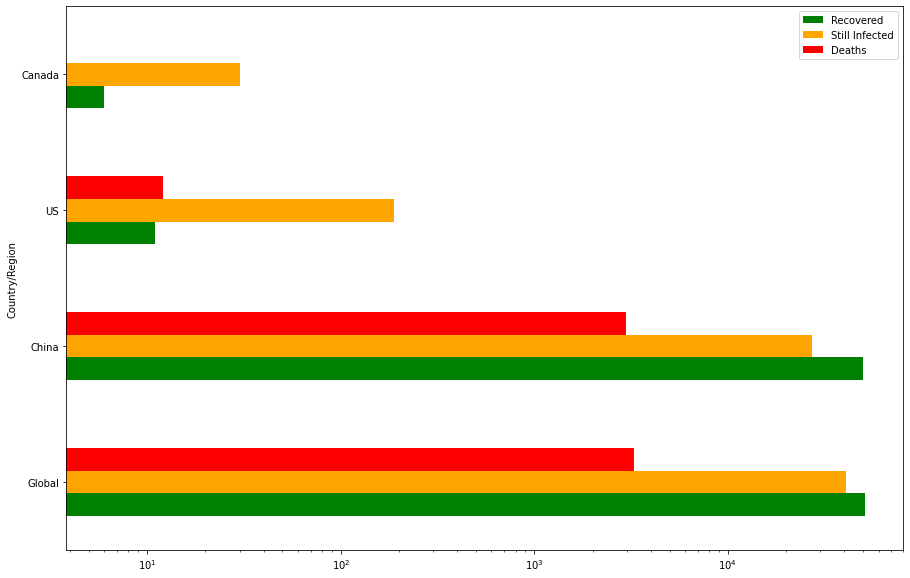

In [60]:
country_df = country_province_df.groupby(['Country/Region']) \
             ['Confirmed', 'Deaths', 'Recovered', 'Still Infected'].sum()
globe = global_overall[global_overall.index == '03/04/2020']
globe = globe.reset_index(drop=True)
globe.index = ['Global']
globe.index.name = 'Country/Region'
china = country_df[country_df.index == 'China']
us = country_df[country_df.index == 'US']
canada = country_df[country_df.index == 'Canada']

temp = globe.append(china.append(us.append(canada)))
fig, ax = plt.subplots(figsize=(15, 10))
temp[['Recovered', 'Still Infected', 'Deaths']].plot.barh(ax=ax, color=['green', 'orange', 'red'])
ax.set_xscale('log')

plt.savefig('Four_Country_Region.png')